# Praca domowa 6

## Zadanie 1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [75]:
df.iloc[0]

id                    7129300520
date             20141013T000000
price                   221900.0
bedrooms                       3
bathrooms                    1.0
sqft_living                 1180
sqft_lot                    5650
floors                       1.0
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  1180
sqft_basement                  0
yr_built                    1955
yr_renovated                   0
zipcode                    98178
lat                      47.5112
long                    -122.257
sqft_living15               1340
sqft_lot15                  5650
Name: 0, dtype: object

In [16]:
df1 = df[(df.waterfront == 1) & (df.grade >= df.grade.median())]
mean_price = df1.price.mean()
mean_price


1784151.7006802722

In [66]:
df[(df.waterfront == 1) & (df.grade >= df.grade.median())].price.mean()

1784151.7006802722

Odp: 1784151.7006802722

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [22]:
df2_2 = df[(df.floors == 2.0)]
df2_3 = df[(df.floors == 3.0)]
med_2 = df2_2.bathrooms.median()
med_3 = df2_3.bathrooms.median()
med_2
med_3

2.5

In [67]:
df[(df.floors == 2.0)].bathrooms.median()  > df[(df.floors == 3.0)].bathrooms.median()

False

Odp: Nie, mediany liczby łazienek są równe (2.5)

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [51]:
max_lat = df.lat.max()
min_lat = df.lat.min()
center = (max_lat + min_lat)/2
center
df_3_y = df[(df.lat >= center) & (df.waterfront == 1)]
q25_y = df_3_y.grade.quantile(0.25)
q75_y = df_3_y.grade.quantile(0.75)
df_3_n = df[(df.lat >= center) & (df.waterfront == 0)]
q25_n = df_3_n.grade.quantile(0.25)
q75_n = df_3_n.grade.quantile(0.75)
q75_n

8.0

Odp: Z widokiem na wodę: q0.25 = 8.0, q0.75 = 10.0; bez widoku na wodę: q0.25 = 7.0, q0.75 = 8.0.

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [65]:
df.zipcode.value_counts()
df_4 = df[df.zipcode == 98103].price
q3 = df_4.quantile(0.75)
q1 = df_4.quantile(0.25)
iqr = q3 - q1
iqr

262875.0

Odp: Pod kodem 98103. IQR cen pod tym adresem wynosi 262875.0.

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [93]:
result = df.sqft_living[df.sqft_living15 > df.sqft_living].count()/df.sqft_living.count()
print(f'{result:.2%}')

42.59%


Odp: 43%

 6. O ile procent więcej jest nieruchomości leżących na północny zachód niż nieruchomości leżących na południowy wschód?

In [94]:
center_lat = center
center_lat
max_long = df.long.max()
min_long = df.long.min()
center_long = (max_long + min_long)/2
center_long

nw = df[(df.lat > center_lat) & (df.long < center_long)].lat.count()
se = df[(df.lat < center_lat) & (df.long > center_long)].lat.count()
answer = (nw - se)/se
print(f'{answer:.2%}')

18343.53%


Odp:

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

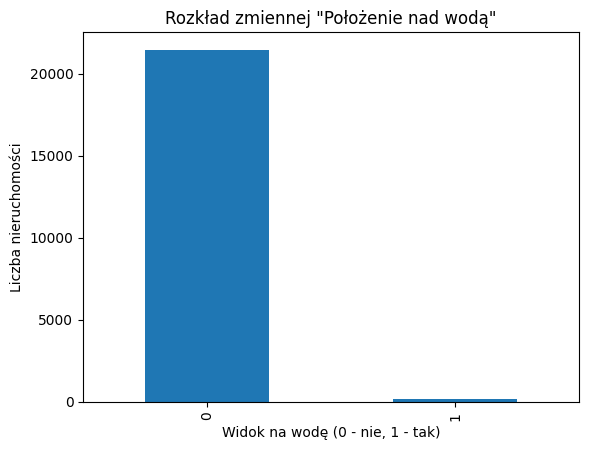

In [159]:
df['waterfront'].value_counts().plot(kind='bar')
plt.title('Rozkład zmiennej "Położenie nad wodą"')
plt.xlabel('Widok na wodę (0 - nie, 1 - tak)')
plt.ylabel('Liczba nieruchomości')
plt.show()

b)

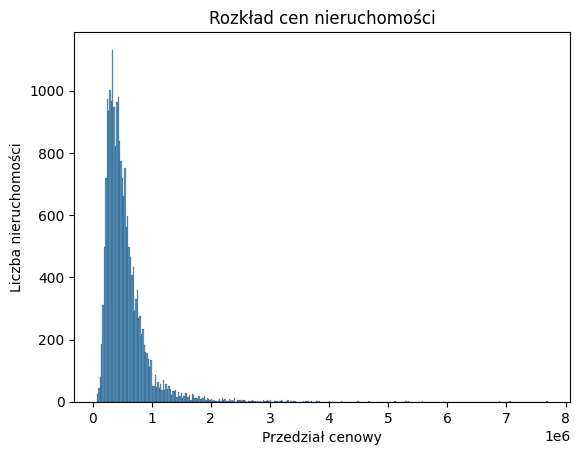

In [156]:
sns.histplot(df.price)
plt.title('Rozkład cen nieruchomości')
plt.xlabel('Przedział cenowy')
plt.ylabel('Liczba nieruchomości')
plt.show()

c)

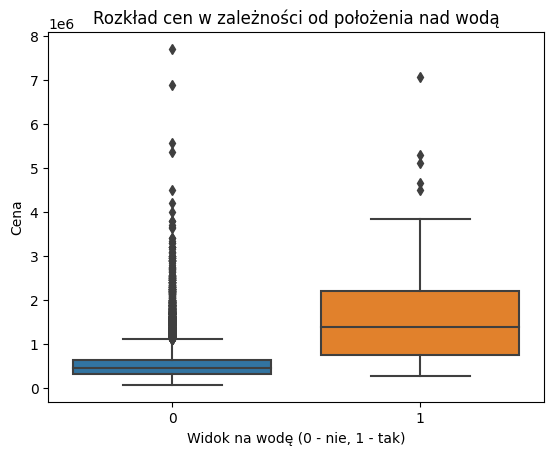

In [153]:
import seaborn as sns
sns.boxplot(x = df.waterfront, y = df.price)
plt.title('Rozkład cen w zależności od położenia nad wodą')
plt.xlabel('Widok na wodę (0 - nie, 1 - tak)')
plt.ylabel('Cena')
plt.show()